In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("smartprix_laptop.xlsx")

In [3]:
df.head()

,productName,price,rating,specScore,features
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12t...,"₹69,990",4.60,69.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4..."
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12t...,"₹74,990",4.05,71.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4..."
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD ...,"₹28,660",4.20,62.0,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Th..."
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen ...,"₹57,990",4.75,61.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (..."
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,"₹24,990",4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, ..."


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

## 1st round of cleaning

In [5]:
df['brand'] = df['productName'].str.split("/").str[0].str.split(" ").str[0]

In [6]:
df['processor'] = df['productName'].str.split("/").str[0].str.split("(").str[1]

In [7]:
df['storage'] = df['productName'].str.split("/").str[2]

In [8]:
df['features'].str.split(",").str[1].value_counts()

 '10 Cores (2P + 8E)               146
 'Octa Core (4P + 4E)               99
 'Octa Core                         86
 'Quad Core                         86
 '16 Cores (6P + 8E + 2LP-E)        78
 'Hexa Core (2P + 4E)               77
 'Hexa Core                         72
 '12 Cores (4P + 8E)                60
 '10 Cores (6P + 4E)                49
 'Dual Core                         45
 '14 Cores (6P + 8E)                35
 '24 Cores (8P + 16E)               31
 '14 Cores (4P + 8E + 2LP-E)        30
 '12 Cores'                         16
 'Octa Core (4P + 4E)'              14
 '14 Cores (6P + 8E)'               14
 '16 Cores (8P + 8E)                12
 'Octa Core'                        12
 '20 Cores (8P + 12E)               12
 '12 Cores (2P + 8E + 2LP-E)         9
 '5 Cores (1P + 4E)                  5
 '16\u2009GB LPDDR5X RAM'            4
 '10 Cores'                          4
 '16 Cores (12P + 4E)'               3
 '12 Cores (6P + 6E)'                3
 '32\u2009GB  RAM'       

In [9]:
def extract_cores(features_str):
    features_list = eval(features_str)
    for feature in features_list:
        if 'Cores' in feature:
            return feature
    return np.nan

# Apply the function to create the 'cores' column
df['cores'] = df['features'].apply(extract_cores)

In [10]:
df['cores'].value_counts()

10 Cores (2P + 8E), 12 Threads            146
16 Cores (6P + 8E + 2LP-E), 22 Threads     78
12 Cores (4P + 8E), 16 Threads             60
10 Cores (6P + 4E), 16 Threads             49
14 Cores (6P + 8E), 20 Threads             35
24 Cores (8P + 16E), 32 Threads            31
14 Cores (4P + 8E + 2LP-E), 18 Threads     30
12 Cores                                   16
14 Cores (6P + 8E)                         14
20 Cores (8P + 12E), 28 Threads            12
16 Cores (8P + 8E), 24 Threads             12
12 Cores (2P + 8E + 2LP-E), 14 Threads      9
5 Cores (1P + 4E), 6 Threads                5
10 Cores                                    4
12 Cores (6P + 6E)                          3
16 Cores (12P + 4E)                         3
14 Cores (10P + 4E)                         2
12 Cores, 24 Threads                        1
11 Cores (5P + 6E)                          1
Name: cores, dtype: int64

In [11]:
def extract_cores(features_str):
    features_list = eval(features_str)
    for feature in features_list:
        if 'RAM' in feature:
            return feature
    return np.nan

# Apply the function to create the 'cores' column
df['ram'] = df['features'].apply(extract_cores)

In [12]:
df['features'].str.split(",").str[6].value_counts()

 '15.6\u2009inches                       472
 '14\u2009inches                         224
 '16\u2009inches                         142
 '16.1\u2009inches                        19
 '13.3\u2009inches                        16
 1920\u2009x\u20091080\u2009pixels'       13
 '17.3\u2009inches                        12
 '14.1\u2009inches                         8
 2560\u2009x\u20091664\u2009pixels'        7
 1366\u2009x\u2009768\u2009pixels'         7
 Touch Screen'                             6
 'Windows 11 OS'                           6
 '17\u2009inches                           6
 3456\u2009x\u20092234\u2009pixels'        6
 3024\u2009x\u20091964\u2009pixels'        5
 2880\u2009x\u20091920\u2009pixels         5
 '14.5\u2009inches                         5
 2880\u2009x\u20091864\u2009pixels'        5
 '13\u2009inches                           5
 '18\u2009inches                           5
 2496\u2009x\u20091664\u2009pixels         3
 '14.2\u2009inches                         3
 2304\u200

In [13]:
def extract_cores(features_str):
    features_list = eval(features_str)
    for feature in features_list:
        if 'inches' in feature:
            return feature
    return np.nan

# Apply the function to create the 'cores' column
df['screen_size'] = df['features'].apply(extract_cores)

In [14]:
def extract_cores(features_str):
    features_list = eval(features_str)
    for feature in features_list:
        if 'Warranty' in feature:
            return feature
    return np.nan

# Apply the function to create the 'cores' column
df['Warranty'] = df['features'].apply(extract_cores)

In [15]:
def extract_cores(features_str):
    features_list = eval(features_str)
    for feature in features_list:
        if 'OS' in feature:
            return feature
    return np.nan

# Apply the function to create the 'cores' column
df['OS'] = df['features'].apply(extract_cores)

In [16]:
df.sample(7)

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS
490,Asus TUF Gaming F15 90NR0GW1-M00F00 Laptop (12th Gen Core i7/ 16GB/ 1TB SSD/ Win11/ 4GB Graph),"₹82,990",4.70,60.0,"['12th Gen Intel Core i7 12700H', '20 Threads', '16\u2009GB DDR5 RAM', '1\u2009TB SSD', '4\u2009GB \u200eNVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,12th Gen Core i7,1TB SSD,NaN,16 GB DDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS
227,Lenovo IdeaPad Slim 3 83ER008GIN Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home),"₹53,990",4.50,57.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB LPDDR5 RAM', '512\u2009GB SSD', 'Intel Integrated UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,12th Gen Core i5,512GB SSD,NaN,16 GB LPDDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS
481,Ultimus Neo NU14U3INT54BN Laptop (10th Gen Core i3/ 8GB/ 256GB SSD/Win11 Home),"₹19,990",4.75,47.0,"['10th Gen Intel Core i3 1005G1', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', 'Intel Integrated Iris', '14.1\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Ultimus,10th Gen Core i3,256GB SSD,NaN,8 GB DDR4 RAM,"14.1 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS
839,Acer Aspire 5 A515-58M UN.KHFSI.004 Gaming Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home),"₹39,990",4.65,51.0,"['13th Gen Intel Core i3 1305U', '5 Cores (1P + 4E), 6 Threads', '8\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,13th Gen Core i3,512GB SSD,"5 Cores (1P + 4E), 6 Threads",8 GB DDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS
113,Acer Aspire Lite AL15-52 Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11),"₹42,990",4.40,59.0,"['12th Gen Intel Core i5 1235U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Iris Xe Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,12th Gen Core i5,512GB SSD,"10 Cores (2P + 8E), 12 Threads",16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS
961,Lenovo Ideapad Flex 5 14IAU7 82R700KHIN Laptop (12th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home),"₹53,990",4.60,53.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2P + 4E), 8 Threads', '8\u2009GB LPDDR4 RAM', '512\u2009GB SSD', 'Intel Integrated UHD', '14\u2009inches, 1920\u2009x\u20091200\u2009pixels, Touch Screen', 'Windows 11 OS', '1 Year Warranty']",Lenovo,12th Gen Core i3,512GB SSD,NaN,8 GB LPDDR4 RAM,"14 inches, 1920 x 1200 pixels, Touch Screen",1 Year Warranty,Windows 11 OS
516,HP 15s-ey2001AU Laptop (AMD Ryzen 7 5700U/ 16GB/ 512GB SSD/ Win11 Home),"₹47,218",4.60,57.0,"['5th Gen AMD Ryzen 7 5700U', 'Octa Core, 16 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'AMD Radeon Radeon', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,AMD Ryzen 7 5700U,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS


In [17]:
graphics_terms = [
    '4gb graph', '8gb graph', '6gb graph', 'intel iris xe graphics', 'intel integrated uhd', 'intel uhd graphics',
    'intel integrated iris xe', 'intel arc graphics', 'amd radeon amd', 'intel integrated', 'amd radeon graphics',
    '12gb graph', 'intel graphics', 'Qualcomm Adreno GPU', '6gb rtx3050 graph', '16gb graph', '4gb graphics',
    'intel integrated uhd graphics', 'integrated intel uhd graphics', '8gb rtx4060', '4 gb graphics', '4gb rtx 2050',
    '8gb graphics', 'amd radeon', 'intel iris xe', '8gb rtx4070', 'intel integrated integrated', '8gb rtx 4070 graph',
    '6gb rtx4050', '6gb rtx3050', 'Apple 8 Core GPU', '6gb graphics', '2gb graph', '4gb rtx3050 graph', '6gb rtx 4050',
    'amd graphics', 'integrated intel arc graphics', 'integrated intel graphics', 'intel integrated graphics',
    'intel integrated arc graphics', '8gb rtx 4060 graph', 'Arm Mali-G72', '4gb rtx 2050 graph', 'iris xe graphics',
    'rtx 3050 6gb graph', 'rtx 2050', 'rtx 4060 8gb graph', '4gb rtx 3050', 'intel hd graphics', 'intel integrated arc',
    '6gb rtx 3050 graph', '6gb rtx4050 graph', 'rtx 3050a', '18 Core GPU', 'intel iris xe graphics comes',
    'intel integrated intel iris xe graphics', 'intel integrated intel arc', 'rtx 4060 8gb graphics', 'intel uhd',
    '8gb graphics rtx 4060', '256, gb ssd', 'rtx 4050', 'intel uhd graphics 600', '4gb  rtx 3050 graph',
    '16gb rtx 4090 graph', 'amd integrated', '6gb rtx3050 graphics', 'amd radeon 610m graphics',
    'integrated intel iris xe graphics', 'integrated intel irisxe graphics', '16gb graphics rtx 4090', '6gb rtx 3050 graphics',
    'rtx 4090', '13.3, inches', 'intel integrated intel uhd graphics', 'rtx 4060', '4gb rtx3050',
    '6gb rtx 4050 graphics', '30 Core GPU', 'intel integrated iris', 'Apple 10 Core GPU', 'rtx 4050 6gb graphics',
    '8gb rtx4070 graph', '10 Core GPU', '6, gb nvidia geforce rtx 4050', '1 year warranty]', '12gb rtx 4080 graph',
    '2240, x, 1400, pixels', 'Not available', '6gb rtx 4050 graph', 'intel iris plus', 'Arm Mali G52 MC2 2EE',
    'intel integrated intel iris xe', 'nvidia rtx a500', '3840, x, 2160, pixels', '4gb rtx2050', 'intel hd',
    'amd radeon vega 8', '2880, x, 1800, pixels', 'intel integrated uhd 600', '2560, x, 1600, pixels',
    '3840, x, 2400, pixels', 'integrated amd radeon graphics', '40 Core GPU', '6gb graph rtx 3050', 'intel arc graphic',
    'intel integrated intel graphics', 'amd radeon radeon graphics', 'rtx 4080', '6 gb graphics', 'intel graphics',
    'intel integarted graphics', '2304, x, 1536, pixels', 'intel arc graphics', 'Arm Mali G52 MC2 2EE Graphics',
    'amd radeon radeon', '1920, x, 1080, pixels', 'amd radeon vega 7 graphics', 'intel iris xᵉ graphics', 'amd radeon 610m'
]

# Function to identify and extract graphics-related terms
def extract_graphics(features_str):
    features_list = eval(features_str)  # Convert string representation of list to list
    for feature in features_list:
        for term in graphics_terms:
            if term in feature.lower():  # Case-insensitive match
                return term
    return np.nan

In [18]:
# Apply the function to create the 'graphics' column
df['graphics'] = df['features'].apply(extract_graphics)

In [19]:
df.isnull().sum()

productName      0
price            0
rating           0
specScore        2
features         0
brand            0
processor        5
storage          0
cores          509
ram              2
screen_size      2
Warranty        14
OS               6
graphics       221
dtype: int64

In [20]:
df[df['cores'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD Ryzen 3 7330U/ 8 GB/ 512 GB SSD/ Win11),"₹28,660",4.20,62.0,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'AMD Radeon AMD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,AMD Ryzen 3 7330U,512 GB SSD,NaN,8 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,amd radeon amd
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ RTX 2050),"₹57,990",4.75,61.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 2050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,12th Gen Core i5,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,rtx 2050
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),"₹24,990",4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,11th Gen Core i3,512GB SSD,NaN,8 GB DDR4 RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,intel iris xe graphics
5,Lenovo V15 G4 ‎83CR000VIN Laptop ( AMD Ryzen 7 7730U/ 16GB/ 512GB SSD/ Win11 Home),"₹39,999",4.50,63.0,"['7th Gen AMD Ryzen 7 7730U', 'Octa Core, 16 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'AMD Radeon Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,AMD Ryzen 7 7730U,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,amd radeon graphics
6,HP Victus 15-fa0333TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB RTX 3050),"₹66,990",4.20,59.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,12th Gen Core i5,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
7,Dell Vostro 3520 Laptop (12th Gen Core i3/ 8GB/ 512GB SSD/ Win11),"₹33,890",4.05,60.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2P + 4E), 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,12th Gen Core i3,512GB SSD,NaN,8 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,intel graphics
8,HP Victus 15-fa1327TX Gaming Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ 6GB RTX3050 Graph),"₹74,990",4.40,63.0,"['13th Gen Intel Core i5 13420H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '6\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,13th Gen Core i5,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
9,HP 15s-fq5326TU Laptop (12th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home),"₹35,890",4.55,55.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2P + 4E), 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Integrated', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,12th Gen Core i3,512GB SSD,NaN,8 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,intel integrated
10,Acer Aspire 7 A715-76G UN.QMYSI.002 Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ 4GB Graph),"₹53,990",4.55,66.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 

In [21]:
# cores_terms = [
#     'Octa Core', 'Hexa Core', 'Quad Core', 'Dual Core'
# ]

# # Function to update missing core values
# def update_cores(features_str, existing_cores):
#     if pd.notna(existing_cores):
#         return existing_cores  # Return existing value if not NaN
    
#     features_list = eval(features_str)  # Convert string representation of list to list
#     for feature in features_list:
#         for term in cores_terms:
#             if term.lower() in feature.lower():  # Case-insensitive match
#                 return term
#     return np.nan  # Return NaN if no term is found

In [22]:
# df['cores'] = df.apply(lambda row: update_cores(row['features'], row['cores']), axis=1)

In [23]:
df.isnull().sum()

productName      0
price            0
rating           0
specScore        2
features         0
brand            0
processor        5
storage          0
cores          509
ram              2
screen_size      2
Warranty        14
OS               6
graphics       221
dtype: int64

In [24]:
df[df['graphics'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12th Gen Core i5/ 16GB/ 1TB SSD/ Win11/ 4GB RTX3050),"₹74,990",4.05,71.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '4\u2009GB NVIDIA GeForce RTX 3050', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,12th Gen Core i5,1TB SSD,"12 Cores (4P + 8E), 16 Threads",16 GB DDR4 RAM,"16 inches, 1920 x 1200 pixels",1 Year Warranty,Windows 11 OS,NaN
6,HP Victus 15-fa0333TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB RTX 3050),"₹66,990",4.20,59.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,12th Gen Core i5,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
8,HP Victus 15-fa1327TX Gaming Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ 6GB RTX3050 Graph),"₹74,990",4.40,63.0,"['13th Gen Intel Core i5 13420H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '6\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,13th Gen Core i5,512GB SSD,NaN,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
11,Dell 15 G15-5530 Gaming Laptop (13th Gen Core i5/ 16GB/ 1TB SSD/ Win11/ 6GB Graph),"₹80,390",4.05,68.0,"['13th Gen Intel Core i5 13450HX', '10 Cores (6P + 4E), 16 Threads', '16\u2009GB DDR5 RAM', '1\u2009TB SSD', '6\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,13th Gen Core i5,1TB SSD,"10 Cores (6P + 4E), 16 Threads",16 GB DDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
14,Apple MacBook Air 2020 MGND3HN Laptop (Apple M1/ 8GB/ 256GB SSD/ MacOS),"₹67,990",4.60,43.0,"['Apple M1', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', 'Apple M1 Integrated Graphics', '13.3\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M1,256GB SSD,NaN,8 GB DDR4 RAM,"13.3 inches, 2560 x 1600 pixels",1 Year Warranty,Mac OS,NaN
17,Asus TUF Gaming A15 FA506NCR-HN075WS Laptop (AMD Ryzen 7 7435HS/ 16GB / 512GB SSD/ Win11 Home / 4GB Graph),"₹75,990",4.70,70.0,"['7th Gen AMD Ryzen 7 7435HS', 'Octa Core, 16 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,AMD Ryzen 7 7435HS,512GB SSD,NaN,16 GB DDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
19,Lenovo LOQ 2024 83GS003NIN Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 6GB RTX 3050 Graph),"₹70,990",4.65,65.0,"['12th Gen Intel Core i5 12450HX', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', '6\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,12th Gen Core i5,512GB SSD,NaN,16 GB DDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
24,Acer Nitro V ANV15-41 UN.QPFSI.002 Gaming Laptop (AMD Ryzen 5 7535HS/ 16GB/ 512GB SSD/ Win11/ 6GB RTX3050 Graph),"₹64,990",4.70,68.0,"['7th Gen AMD Ryzen 5 7535HS', 'Hexa Core, 12 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', '6\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,AMD Ryzen 5 7535HS,512GB SSD,NaN,16 GB DDR5 RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
25,HP Victus 15-FA0888TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB Graph),"₹

In [25]:
graphics_terms = ['NVIDIA GeForce RTX 3050', 'Apple M1 Integrated Graphics', 'NVIDIA GeForce RTX 4070','8-Core GPU', '10 Core GPU','Qualcomm Adreno GPU', 'Arm Mali-G72 MP3', '40 Core GPU', 'NVIDIA','40 Core GPU','NVIDIA GeForce GTX 1650','NVIDIA GeForce RTX 4080','14 Core GPU','ARM Mali G72', 'Intel Arc Graphics', 'Intel Integrated Integrated', 'AMD Radeon Graphics']

In [26]:
# Function to update missing core values
def update_graphics(features_str, existing_cores):
    if pd.notna(existing_cores):
        return existing_cores  # Return existing value if not NaN
    
    features_list = eval(features_str)  # Convert string representation of list to list
    for feature in features_list:
        for term in graphics_terms:
            if term.lower() in feature.lower():  # Case-insensitive match
                return term
    return np.nan  # Return NaN if no term is found

In [27]:
df['graphics'] = df.apply(lambda row: update_graphics(row['features'], row['graphics']), axis=1)

In [28]:
df.isnull().sum()

productName      0
price            0
rating           0
specScore        2
features         0
brand            0
processor        5
storage          0
cores          509
ram              2
screen_size      2
Warranty        14
OS               6
graphics        26
dtype: int64

In [29]:
df[df['graphics'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
54,Apple MacBook Air 2024 Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,04,990",4.25,46.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB RAM', '256\u2009GB SSD', 'Apple 8 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,256GB SSD,NaN,8 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,NaN
123,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,10,990",4.75,54.0,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,NaN,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
161,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,10,990",4.75,54.0,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,NaN,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
337,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,02,990",4.20,42.0,"['Apple M2 Apple M2 Chip', 'Octa Core', '8\u2009GB Unified Memory RAM', '512\u2009GB SSD', '10-Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,NaN,8 GB Unified Memory RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,NaN
350,Dell Inspiron 7440 2 in 1 Laptop (Intel Core 5 120U/ 16GB/ 512GB SSD/ Win11),"₹84,176",4.50,62.0,"['Intel Core 5 Processor Series 1 120U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphic', '14\u2009inches, 2240\u2009x\u20091400\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,Intel Core 5 120U,512GB SSD,"10 Cores (2P + 8E), 12 Threads",16 GB DDR5 RAM,"14 inches, 2240 x 1400 pixels",1 Year Warranty,Windows 11 OS,NaN
353,Dell 14 Vostro 3440 Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ Win11),"₹50,990",4.25,57.0,"['13th Gen Intel Core i5 1334U', '10 Cores (2P + 8E), 12 Threads', '8\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,13th Gen Core i3,512GB SSD,"10 Cores (2P + 8E), 12 Threads",8 GB DDR5 RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
432,Apple MacBook Air 15 2024 MRYR3HN/A Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,23,900",4.10,54.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,NaN,8GB,NaN,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
434,Xiaomi Redmi Book Pro 16 2024 Laptop (Intel Core Ultra 5/ 32GB/ 1TB SSD/ Win 11),"₹69,990",4.05,62.0,"['Intel Core Ultra 5 Series 1 125H', '14 Cores (4P + 8E + 2LP-E), 18 Threads', '32\u2009GB LPDDR5x RAM', '1\u2009TB SSD', 'Intel ARC Graphics', '16\u2009inches, 3072\u2009x\u20091920\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Xiaomi,Intel Core Ultra 5,1TB SSD,"14 Cores (4P + 8E + 2LP-E), 18 Threads",32 GB LPDDR5x RAM,"16 inches, 3072 x 1920 pixels",1 Year Warranty,Windows 11 OS,NaN
444,Lenovo Ideapad Slim 3 Chrome 14M868 82XJ002LHA Laptop (MediaTek Kompanio 520/ 4GB/ 128GB eMMC/ Chrome OS),"₹19,990",4.65,28.0,"['MediaTek Kompanio 520 Kompanio 520', 'Octa Core', '4\u2009GB LPDDR4X RAM', '128\u2009GB Hard Disk', 'Arm Mali G52 MC2 2EE Graphics', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",Lenovo,MediaTek Kompanio 520,128GB eMMC,NaN,4 GB LPDDR4X RAM,"14 inches, 1366 x 768 pixels",1 Year Warranty,Chrome OS,NaN
556,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 256GB SSD/ MacOS),"₹1,01,990",4.55,52.0,"['Apple 

In [30]:
#removing rows at 578 & 609 bcoz it has all data missing
df = df.drop([578, 609])

In [31]:
df.isnull().sum()

productName      0
price            0
rating           0
specScore        0
features         0
brand            0
processor        5
storage          0
cores          507
ram              0
screen_size      0
Warranty        12
OS               4
graphics        24
dtype: int64

In [32]:
#filling nan in cores with no cores as that info not available
df['cores'].fillna('No Cores', inplace=True)

In [33]:
df.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       5
storage         0
cores           0
ram             0
screen_size     0
Warranty       12
OS              4
graphics       24
dtype: int64

In [34]:
df[df['processor'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
59,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '256\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,NaN,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU
133,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '256\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,NaN,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU
264,Apple MacBook Air 2024 MXCT3HN/A Laptop (Apple M3/ 16GB/ 512GB SSD/ MacOS),"₹1,47,990",4.05,52.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '512\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,NaN,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU
432,Apple MacBook Air 15 2024 MRYR3HN/A Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,23,900",4.10,54.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,NaN,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
900,Apple MacBook Air 2024 MRYN3HN/A Laptop (Apple M3/ 8GB/ 512GB SSD/ MacOS),"₹1,45,490",4.15,56.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,NaN,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN


In [35]:
#filing with apple m3
df['processor'].fillna('Apple M3', inplace=True)

In [36]:
df.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       0
storage         0
cores           0
ram             0
screen_size     0
Warranty       12
OS              4
graphics       24
dtype: int64

In [37]:
df[df['Warranty'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
86,Dell Precision 5550 Laptop (10th Gen Core i7/ 16GB/ 512GB SSD/ Win10 Pro/ 4GB Graph),"₹1,84,999",4.20,66.0,"['10th Gen Intel Core i7 10750H', 'Hexa Core, 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA', '15.6\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 10 OS', 'Backlit Keyboard']",Dell,10th Gen Core i7,512GB SSD,No Cores,16 GB DDR4 RAM,"15.6 inches, 1920 x 1200 pixels",NaN,Windows 10 OS,NVIDIA
87,MSI Titan 18 HX A14VIG-201IN Gaming Laptop (14th Gen Core i9/ 128GB/ 4TB SSD/ Win11 Home/ 16GB Graphics RTX 4090),"₹5,49,990",4.40,93.0,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '128\u2009GB DDR5 RAM', '192\u2009GB Hard Disk', '4\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 4090', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS']",MSI,14th Gen Core i9,4TB SSD,"24 Cores (8P + 16E), 32 Threads",128 GB DDR5 RAM,"18 inches, 3840 x 2400 pixels",NaN,Windows 11 OS,rtx 4090
546,MSI Thin GF63 12VF-268IN Laptop (12th Gen Core i5/ 16GB/ 1TB 256GB SSD/ Win11/ 8GB Graph),"₹95,990",4.00,72.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB Hard Disk', '256\u2009GB SSD', '8\u2009GB NVIDIA GeForce RTX 4060', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS']",MSI,12th Gen Core i5,1TB 256GB SSD,No Cores,16 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",NaN,Windows 11 OS,rtx 4060
587,Lenovo IdeaPad Gaming 3 82K201Y9IN Laptop (AMD Ryzen 5-5600H/ 8GB/ 1TB 256GB SSD/ Win11 Home/ 4GB Graph),"₹47,990",4.25,65.0,"['5th Gen AMD Ryzen 5 5600H', 'Hexa Core, 12 Threads', '8\u2009GB DDR4 RAM', '1\u2009TB Hard Disk', '256\u2009GB SSD', '4\u2009GB NVIDIA GeForce GTX 1650', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS']",Lenovo,AMD Ryzen 5-5600H,1TB 256GB SSD,No Cores,8 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",NaN,Windows 11 OS,NVIDIA
590,HP 15s-du3614TU Laptop (11th Gen Core i3/ 8GB/ 1TB 256GB SSD/ Win11 Home),"₹37,490",4.20,61.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '1\u2009TB Hard Disk', '256\u2009GB SSD', 'Intel Integrated UHD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS']",HP,11th Gen Core i3,1TB 256GB SSD,No Cores,8 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",NaN,Windows 11 OS,intel integrated uhd
628,HP 15s-du3614TU Laptop (11th Gen Core i3/ 8GB/ 1TB 256GB SSD/ Win11 Home),"₹37,791",4.20,61.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '1\u2009TB Hard Disk', '256\u2009GB SSD', 'Intel Integrated UHD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS']",HP,11th Gen Core i3,1TB 256GB SSD,No Cores,8 GB DDR4 RAM,"15.6 inches, 1920 x 1080 pixels",NaN,Windows 11 OS,intel integrated uhd
650,Apple MacBook Air 2020 Laptop (10th Gen Core i3/ 8GB/ 256GB SSD/ MacOS),"₹72,999",3.85,48.0,"['10th Gen Intel Core i3', 'Quad Core, 8 Threads', '8\u2009GB LPDDR4X RAM', '256\u2009GB SSD', 'Intel Iris Plus', '13.3\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Mac 10.15.3\t OS', 'Backlit Keyboard']",Apple,10th Gen Core i3,256GB SSD,No Cores,8 GB LPDDR4X RAM,"13.3 inches, 2560 x 1600 pixels",NaN,Mac 10.15.3\t OS,intel iris plus
890,Lenovo Thinkpad E16 21JN004GIG Laptop (13th Gen Core i5/ 8GB/ 512GB SSD/ DOS),"₹63,490",4.25,59.0,"['13th Gen Intel Core i5 1335U', '10 Cores (2P + 8E), 12 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Integrated Iris Xe', '16\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 USB 3.0 Ports']",Lenovo,13th Gen Core i5,512GB SSD,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,"16 inches, 1920 x 1080 pixels",NaN,Windows 11 OS,intel integrated iris xe
891,Lenovo Thinkpad E16 G1 21JN004DIG Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ DOS),"₹43,600",4.75,54.0,"['13th Gen Intel Core i3 1315U', 'Hexa Cor

In [38]:
#filing with no warranty
df['Warranty'].fillna('No Warranty', inplace=True)

In [39]:
df.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       0
storage         0
cores           0
ram             0
screen_size     0
Warranty        0
OS              4
graphics       24
dtype: int64

In [40]:
df[df['OS'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
285,Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 64B eMMC/ Prime OS),"₹10,990",4.25,30.0,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Primebook,MediaTek MT8183,64B eMMC,No Cores,4 GB LPDDR4 RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,NaN,ARM Mali G72
474,Primebook S Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 128GB eMMC/ Prime OS),"₹13,490",4.15,30.0,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '128\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Primebook,MediaTek MT8183,128GB eMMC,No Cores,4 GB LPDDR4 RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,NaN,ARM Mali G72
970,Samsung Galaxy Book 4 Ultra Laptop (Intel Core Ultra 7 155H/ 32 GB RAM/ 1 TB SSD/ 6 GB Graphics),"₹2,99,999",4.15,75.0,"['Intel Core Ultra 7 155H', '16 Cores (6P + 8E + 2LP-E), 22 Threads', '32\u2009GB LPDDR5X RAM', '1\u2009TB SSD', '6\u2009GB NVIDIA GeForce RTX 4050', '16\u2009inches, 2880\u2009x\u20091800\u2009pixels, Touch Screen', 'Backlit Keyboard']",Samsung,Intel Core Ultra 7 155H,1 TB SSD,"16 Cores (6P + 8E + 2LP-E), 22 Threads",32 GB LPDDR5X RAM,"16 inches, 2880 x 1800 pixels, Touch Screen",No Warranty,NaN,rtx 4050
982,Jio JioBook Cloud Laptop (Octa Core/ 4GB/ 64GB eMMC/ JioOS),"₹14,999",4.15,19.0,"['Octa Core', '4\u2009GB \u200eLPDDR4 RAM', '64\u2009GB Hard Disk', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty']",Jio,Octa Core,64GB eMMC,No Cores,4 GB ‎LPDDR4 RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,NaN,NaN


In [41]:
#filing with no os
df['OS'].fillna('No OS', inplace=True)

In [42]:
df.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       0
storage         0
cores           0
ram             0
screen_size     0
Warranty        0
OS              0
graphics       24
dtype: int64

In [43]:
df[df['graphics'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
54,Apple MacBook Air 2024 Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,04,990",4.25,46.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB RAM', '256\u2009GB SSD', 'Apple 8 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,256GB SSD,No Cores,8 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,NaN
123,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,10,990",4.75,54.0,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
161,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,10,990",4.75,54.0,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
337,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,02,990",4.20,42.0,"['Apple M2 Apple M2 Chip', 'Octa Core', '8\u2009GB Unified Memory RAM', '512\u2009GB SSD', '10-Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,No Cores,8 GB Unified Memory RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,NaN
350,Dell Inspiron 7440 2 in 1 Laptop (Intel Core 5 120U/ 16GB/ 512GB SSD/ Win11),"₹84,176",4.50,62.0,"['Intel Core 5 Processor Series 1 120U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphic', '14\u2009inches, 2240\u2009x\u20091400\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,Intel Core 5 120U,512GB SSD,"10 Cores (2P + 8E), 12 Threads",16 GB DDR5 RAM,"14 inches, 2240 x 1400 pixels",1 Year Warranty,Windows 11 OS,NaN
353,Dell 14 Vostro 3440 Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ Win11),"₹50,990",4.25,57.0,"['13th Gen Intel Core i5 1334U', '10 Cores (2P + 8E), 12 Threads', '8\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,13th Gen Core i3,512GB SSD,"10 Cores (2P + 8E), 12 Threads",8 GB DDR5 RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
432,Apple MacBook Air 15 2024 MRYR3HN/A Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,23,900",4.10,54.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
434,Xiaomi Redmi Book Pro 16 2024 Laptop (Intel Core Ultra 5/ 32GB/ 1TB SSD/ Win 11),"₹69,990",4.05,62.0,"['Intel Core Ultra 5 Series 1 125H', '14 Cores (4P + 8E + 2LP-E), 18 Threads', '32\u2009GB LPDDR5x RAM', '1\u2009TB SSD', 'Intel ARC Graphics', '16\u2009inches, 3072\u2009x\u20091920\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Xiaomi,Intel Core Ultra 5,1TB SSD,"14 Cores (4P + 8E + 2LP-E), 18 Threads",32 GB LPDDR5x RAM,"16 inches, 3072 x 1920 pixels",1 Year Warranty,Windows 11 OS,NaN
444,Lenovo Ideapad Slim 3 Chrome 14M868 82XJ002LHA Laptop (MediaTek Kompanio 520/ 4GB/ 128GB eMMC/ Chrome OS),"₹19,990",4.65,28.0,"['MediaTek Kompanio 520 Kompanio 520', 'Octa Core', '4\u2009GB LPDDR4X RAM', '128\u2009GB Hard Disk', 'Arm Mali G52 MC2 2EE Graphics', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",Lenovo,MediaTek Kompanio 520,128GB eMMC,No Cores,4 GB LPDDR4X RAM,"14 inches, 1366 x 768 pixels",1 Year Warranty,Chrome OS,NaN
556,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 256GB SSD/ Mac

In [44]:
#update missing 
graphics_terms = ['Intel Integrated']

# Function to update missing core values
def update_graphics(features_str, existing_cores):
    if pd.notna(existing_cores):
        return existing_cores  # Return existing value if not NaN
    
    features_list = eval(features_str)  # Convert string representation of list to list
    for feature in features_list:
        for term in graphics_terms:
            if term.lower() in feature.lower():  # Case-insensitive match
                return term
    return np.nan  # Return NaN if no term is found


df['graphics'] = df.apply(lambda row: update_graphics(row['features'], row['graphics']), axis=1)

In [45]:
df.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       0
storage         0
cores           0
ram             0
screen_size     0
Warranty        0
OS              0
graphics       24
dtype: int64

In [46]:
df[df['graphics'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
54,Apple MacBook Air 2024 Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,04,990",4.25,46.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB RAM', '256\u2009GB SSD', 'Apple 8 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,256GB SSD,No Cores,8 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,NaN
123,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,10,990",4.75,54.0,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
161,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,10,990",4.75,54.0,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
337,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS),"₹1,02,990",4.20,42.0,"['Apple M2 Apple M2 Chip', 'Octa Core', '8\u2009GB Unified Memory RAM', '512\u2009GB SSD', '10-Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M2,512GB SSD,No Cores,8 GB Unified Memory RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,NaN
350,Dell Inspiron 7440 2 in 1 Laptop (Intel Core 5 120U/ 16GB/ 512GB SSD/ Win11),"₹84,176",4.50,62.0,"['Intel Core 5 Processor Series 1 120U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphic', '14\u2009inches, 2240\u2009x\u20091400\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,Intel Core 5 120U,512GB SSD,"10 Cores (2P + 8E), 12 Threads",16 GB DDR5 RAM,"14 inches, 2240 x 1400 pixels",1 Year Warranty,Windows 11 OS,NaN
353,Dell 14 Vostro 3440 Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ Win11),"₹50,990",4.25,57.0,"['13th Gen Intel Core i5 1334U', '10 Cores (2P + 8E), 12 Threads', '8\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,13th Gen Core i3,512GB SSD,"10 Cores (2P + 8E), 12 Threads",8 GB DDR5 RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
432,Apple MacBook Air 15 2024 MRYR3HN/A Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,23,900",4.10,54.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,NaN
434,Xiaomi Redmi Book Pro 16 2024 Laptop (Intel Core Ultra 5/ 32GB/ 1TB SSD/ Win 11),"₹69,990",4.05,62.0,"['Intel Core Ultra 5 Series 1 125H', '14 Cores (4P + 8E + 2LP-E), 18 Threads', '32\u2009GB LPDDR5x RAM', '1\u2009TB SSD', 'Intel ARC Graphics', '16\u2009inches, 3072\u2009x\u20091920\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Xiaomi,Intel Core Ultra 5,1TB SSD,"14 Cores (4P + 8E + 2LP-E), 18 Threads",32 GB LPDDR5x RAM,"16 inches, 3072 x 1920 pixels",1 Year Warranty,Windows 11 OS,NaN
444,Lenovo Ideapad Slim 3 Chrome 14M868 82XJ002LHA Laptop (MediaTek Kompanio 520/ 4GB/ 128GB eMMC/ Chrome OS),"₹19,990",4.65,28.0,"['MediaTek Kompanio 520 Kompanio 520', 'Octa Core', '4\u2009GB LPDDR4X RAM', '128\u2009GB Hard Disk', 'Arm Mali G52 MC2 2EE Graphics', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",Lenovo,MediaTek Kompanio 520,128GB eMMC,No Cores,4 GB LPDDR4X RAM,"14 inches, 1366 x 768 pixels",1 Year Warranty,Chrome OS,NaN
556,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 256GB SSD/ Mac

In [47]:
graphics_terms = ['Apple 8 Core GPU', '10-Core GPU',  'Intel Graphics', 'Intel ARC Graphics', 'Arm Mali G52 MC2 2EE Graphics', "Intel Arc A370M Graphics", 'Radeon Pro 5500M', 'Geforce MX130', 'Intel Arc A530M', 'Arm Mali G52 MC2 2EE', '18 Core GPU','30 Core GPU','18 Core GPU']

# Function to update missing core values
def update_graphics(features_str, existing_cores):
    if pd.notna(existing_cores):
        return existing_cores  # Return existing value if not NaN
    
    features_list = eval(features_str)  # Convert string representation of list to list
    for feature in features_list:
        for term in graphics_terms:
            if term.lower() in feature.lower():  # Case-insensitive match
                return term
    return np.nan  # Return NaN if no term is found


df['graphics'] = df.apply(lambda row: update_graphics(row['features'], row['graphics']), axis=1)

In [48]:
df.isnull().sum()

productName    0
price          0
rating         0
specScore      0
features       0
brand          0
processor      0
storage        0
cores          0
ram            0
screen_size    0
Warranty       0
OS             0
graphics       5
dtype: int64

In [49]:
df[df['graphics'].isnull()]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
350,Dell Inspiron 7440 2 in 1 Laptop (Intel Core 5 120U/ 16GB/ 512GB SSD/ Win11),"₹84,176",4.50,62.0,"['Intel Core 5 Processor Series 1 120U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphic', '14\u2009inches, 2240\u2009x\u20091400\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,Intel Core 5 120U,512GB SSD,"10 Cores (2P + 8E), 12 Threads",16 GB DDR5 RAM,"14 inches, 2240 x 1400 pixels",1 Year Warranty,Windows 11 OS,NaN
353,Dell 14 Vostro 3440 Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ Win11),"₹50,990",4.25,57.0,"['13th Gen Intel Core i5 1334U', '10 Cores (2P + 8E), 12 Threads', '8\u2009GB DDR5 RAM', '512\u2009GB SSD', 'Intel Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,13th Gen Core i3,512GB SSD,"10 Cores (2P + 8E), 12 Threads",8 GB DDR5 RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Windows 11 OS,NaN
434,Xiaomi Redmi Book Pro 16 2024 Laptop (Intel Core Ultra 5/ 32GB/ 1TB SSD/ Win 11),"₹69,990",4.05,62.0,"['Intel Core Ultra 5 Series 1 125H', '14 Cores (4P + 8E + 2LP-E), 18 Threads', '32\u2009GB LPDDR5x RAM', '1\u2009TB SSD', 'Intel ARC Graphics', '16\u2009inches, 3072\u2009x\u20091920\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Xiaomi,Intel Core Ultra 5,1TB SSD,"14 Cores (4P + 8E + 2LP-E), 18 Threads",32 GB LPDDR5x RAM,"16 inches, 3072 x 1920 pixels",1 Year Warranty,Windows 11 OS,NaN
969,Huawei Qingyun L540 Laptop (Kirin 9006C/ 8 GB RAM/ 256 GB SSD/ Kirin OS),"₹70,499",4.30,23.0,"['Kirin 9006C', '8\u2009GB RAM', '256\u2009GB SSD', '14\u2009inches, 2160\u2009x\u20091440\u2009pixels', 'Linux OS']",Huawei,Kirin 9006C,256 GB SSD,No Cores,8 GB RAM,"14 inches, 2160 x 1440 pixels",No Warranty,Linux OS,NaN
982,Jio JioBook Cloud Laptop (Octa Core/ 4GB/ 64GB eMMC/ JioOS),"₹14,999",4.15,19.0,"['Octa Core', '4\u2009GB \u200eLPDDR4 RAM', '64\u2009GB Hard Disk', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty']",Jio,Octa Core,64GB eMMC,No Cores,4 GB ‎LPDDR4 RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,No OS,NaN


In [50]:
# Update specific rows in the 'graphics' column
df.loc[353, 'graphics'] = 'Intel Graphics'
df.loc[434, 'graphics'] = 'Intel ARC Graphics'

# Fill any remaining NaN values in the 'graphics' column with 'Not available'
df['graphics'].fillna('Not available', inplace=True)

In [51]:
df.isnull().sum()

productName    0
price          0
rating         0
specScore      0
features       0
brand          0
processor      0
storage        0
cores          0
ram            0
screen_size    0
Warranty       0
OS             0
graphics       0
dtype: int64

In [52]:
df.to_excel("cleaned_smartprix_laptop.xlsx", index=False)

## 2nd round cleaning 

In [53]:
df1 = df.copy()

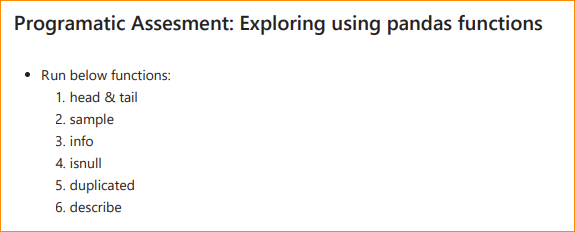

## issues with data

1. Dirty Data
    - there are 73 duplicates, check & remove
    - no missing values
    - price: remove ₹ & make it int
    - brand: < 20 to others
    - processor: categorize them into lower categories
    - storage: remove gb or tb & convert into same scale
    - ram: convert into same scale
    - Warranty: change into months & keep only number & remove everything else
    - os: remove os & fix \t : Mac 10.15.3\t OS
    - graphics: categorize them into lower categories

2. Messy Data
    - storage: change into 2 col: storage_capacity & storage_type
    - cores: remove other info, only keep core count
    - ram: change into 2 col: ram capacity & ram count
    - screen_size: change into 3 cols: size, resolution & touch screen True or False
    
    
3. label and categorize the issues with the data as Completeness, Validity, Accuracy, and Inconsistency

    - Completeness:

        + No missing values: Ensure that there are no missing values in the dataset.
        + 73 duplicates: Check and remove duplicate records to ensure data uniqueness.
    
    - Validity:

        + Price: Remove the ₹ symbol and convert prices to integer values.
        + Warranty: Convert warranty periods into months and keep only numerical values. Remove any non-numerical characters.
        + OS: Remove unnecessary text like "OS" and fix escape sequences (e.g., convert Mac 10.15.3\t OS to Mac 10.15.3).
    
    - Accuracy:

        + Brand: Consolidate brands with fewer than 20 occurrences into an "Others" category.
        + Processor: Categorize processors into lower-level categories (e.g., i3, i5, i7).
        + Storage: Remove "GB" or "TB" and convert all storage values into a uniform scale (e.g., convert everything to GB).
        + RAM: Convert RAM values into a uniform scale (e.g., GB).
        + Graphics: Categorize graphics-related terms into broader, standardized categories.
    
    - Inconsistency:

        + Screen_size: Change into three columns: size, resolution, and touch screen (True or False).
        
        
        
        
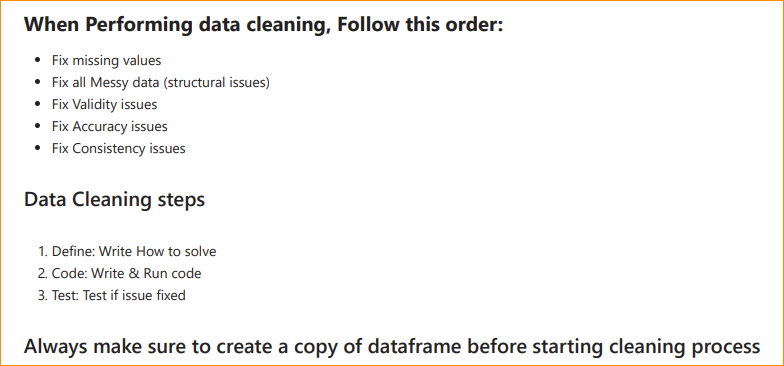        

In [54]:
df1.isnull().sum()

productName    0
price          0
rating         0
specScore      0
features       0
brand          0
processor      0
storage        0
cores          0
ram            0
screen_size    0
Warranty       0
OS             0
graphics       0
dtype: int64

In [55]:
df1.duplicated().sum()

73

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1019
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productName  1018 non-null   object 
 1   price        1018 non-null   object 
 2   rating       1018 non-null   float64
 3   specScore    1018 non-null   float64
 4   features     1018 non-null   object 
 5   brand        1018 non-null   object 
 6   processor    1018 non-null   object 
 7   storage      1018 non-null   object 
 8   cores        1018 non-null   object 
 9   ram          1018 non-null   object 
 10  screen_size  1018 non-null   object 
 11  Warranty     1018 non-null   object 
 12  OS           1018 non-null   object 
 13  graphics     1018 non-null   object 
dtypes: float64(2), object(12)
memory usage: 151.6+ KB


In [57]:
df1['price'].sample(5)

503      ₹68,890
329      ₹61,400
419      ₹52,990
681      ₹60,780
889    ₹1,50,990
Name: price, dtype: object

In [58]:
df1['rating'].describe()

count    1018.000000
mean        4.375688
std         0.235443
min         3.850000
25%         4.200000
50%         4.400000
75%         4.600000
max         4.750000
Name: rating, dtype: float64

In [59]:
df1['specScore'].describe()

count    1018.000000
mean       61.155206
std        11.171915
min        19.000000
25%        54.000000
50%        61.000000
75%        68.000000
max        98.000000
Name: specScore, dtype: float64

In [60]:
df1['brand'].value_counts()

HP           207
Lenovo       193
Asus         142
MSI          113
Acer         100
Dell          94
Samsung       30
Apple         27
Infinix       23
Microsoft     21
Honor          8
Gigabyte       7
Thomson        6
Xiaomi         6
Chuwi          5
Zebronics      4
Colorful       4
Primebook      4
Huawei         4
Avita          4
AGB            3
Ultimus        3
Air            2
Realme         2
Razer          1
ASUS           1
‎Lenovo        1
Walker         1
Red            1
Jio            1
Name: brand, dtype: int64

In [61]:
df1['processor'].value_counts()

12th Gen Core i5                      137
13th Gen Core i5                      101
13th Gen Core i7                       83
12th Gen Core i3                       57
12th Gen Core i7                       46
Intel Core Ultra 7 155H                34
11th Gen Core i5                       29
14th Gen Core i9                       23
13th Gen Core i3                       21
13th Gen Core i9                       20
14th Gen Core i7                       18
Intel Core Ultra 9 185H                16
Intel Core Ultra 5 125H                15
AMD Ryzen 7 7840HS                     14
Intel Core Ultra 7                     14
Snapdragon X Elite                     13
Intel Core Ultra 5                     13
11th Gen Core i7                       11
AMD Ryzen 7 5700U                      10
AMD Ryzen 5 5500U                       9
AMD Ryzen 5 7535HS                      9
Apple M3                                8
11th Gen Core i3                        8
Ryzen 3 7320U                     

In [62]:
#strip all column rows
df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [63]:
df1['processor'].value_counts()

12th Gen Core i5                      137
13th Gen Core i5                      101
13th Gen Core i7                       83
12th Gen Core i3                       58
12th Gen Core i7                       48
Intel Core Ultra 7 155H                36
11th Gen Core i5                       31
14th Gen Core i9                       23
13th Gen Core i3                       21
13th Gen Core i9                       20
14th Gen Core i7                       18
Intel Core Ultra 7                     17
Intel Core Ultra 9 185H                17
Intel Core Ultra 5 125H                17
AMD Ryzen 7 7840HS                     14
Snapdragon X Elite                     14
AMD Ryzen 5 7535HS                     13
Intel Core Ultra 5                     13
11th Gen Core i7                       11
11th Gen Core i3                       10
AMD Ryzen 5 5500U                      10
AMD Ryzen 7 5700U                      10
Celeron N4020                           8
AMD Ryzen 5 7530U                 

In [64]:
df1['storage'].sample(5)

788    256GB SSD
452    512GB SSD
245    512GB SSD
78       1TB SSD
109      1TB SSD
Name: storage, dtype: object

In [65]:
df1['cores'].sample(5)

386            10 Cores (2P + 8E), 12 Threads
296                                  No Cores
264                                  No Cores
247                                  No Cores
854    16 Cores (6P + 8E + 2LP-E), 22 Threads
Name: cores, dtype: object

In [66]:
df1['ram'].value_counts()

16 GB DDR4 RAM              231
8 GB DDR4 RAM               194
16 GB DDR5 RAM              162
16 GB LPDDR5 RAM             71
16 GB LPDDR5X RAM            56
32 GB DDR5 RAM               36
8 GB LPDDR5 RAM              33
16 GB LPDDR5x RAM            20
8 GB LPDDR4X RAM             18
8 GB  RAM                    16
16 GB  RAM                   15
32 GB LPDDR5X RAM            15
8 GB DDR5 RAM                14
16 GB LPDDR4X RAM            11
32 GB LPDDR5x RAM            11
16 GB LPDDR4x RAM            10
4 GB LPDDR4X RAM              8
32 GB LPDDR5 RAM              8
8 GB LPDDR4x RAM              6
32 GB  RAM                    5
4 GB LPDDR4 RAM               5
24 GB DDR5 RAM                5
64 GB DDR5 RAM                4
32 GB LPDDR4X RAM             4
16 GB ‎LPDDR5x RAM            4
12 GB DDR5 RAM                4
16 GB LPDDR4 RAM              3
8 GB LPDDR4 RAM               3
16 GB LPDDR5  RAM             3
18 GB  RAM                    3
36 GB  RAM                    3
32 GB DD

In [67]:
df1['screen_size'].value_counts()

15.6 inches, 1920 x 1080 pixels                  458
14 inches, 1920 x 1080 pixels                     80
16 inches, 1920 x 1200 pixels                     53
14 inches, 1920 x 1200 pixels                     52
16 inches, 2560 x 1600 pixels                     49
14 inches, 1920 x 1200 pixels, Touch Screen       24
14 inches, 2880 x 1800 pixels                     24
14 inches, 1366 x 768 pixels                      13
16 inches, 1920 x 1080 pixels                     12
16.1 inches, 1920 x 1080 pixels                   12
15.6 inches, 1366 x 768 pixels                    11
16 inches, 2880 x 1800 pixels, Touch Screen       11
14 inches, 2880 x 1800 pixels, Touch Screen       10
13 inches, 2880 x 1920 pixels, Touch Screen        9
17.3 inches, 1920 x 1080 pixels                    8
11.6 inches, 1366 x 768 pixels                     8
13.6 inches, 2560 x 1664 pixels                    7
15.6 inches, 1920 x 1080 pixels, Touch Screen      7
14 inches, 1920 x 1080 pixels, Touch Screen   

In [68]:
df1['Warranty'].value_counts()

1 Year Warranty      903
2 Year Warranty       94
No Warranty           12
3 Year Warranty        8
1 Months Warranty      1
Name: Warranty, dtype: int64

In [69]:
df1[df1['Warranty'] == "1 Months Warranty"]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics
620,Chuwi HeroBook Pro Laptop (Intel Celeron N4020/ 8GB/ 256GB SSD/ Win11),"₹16,990",4.7,42.0,"['Intel \u200eCeleron N4020', 'Dual Core, 2 Threads', '8\u2009GB DDR3 RAM', '256\u2009GB SSD', 'Intel HD Graphics', '14.1\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Windows 11 OS', '1 Months Warranty']",Chuwi,Intel Celeron N4020,256GB SSD,No Cores,8 GB DDR3 RAM,"14.1 inches, 1366 x 768 pixels",1 Months Warranty,Windows 11 OS,intel hd graphics


In [70]:
df1['OS'].value_counts()

Windows 11 OS       923
Mac OS               25
Chrome OS            19
DOS OS               14
Windows 10 OS        11
Chrome OS OS          5
No OS                 4
Windows 11  OS        4
Linux OS              3
Windows OS            3
Android 11 OS         2
Ubuntu OS             2
Windows 10  OS        1
Mac 10.15.3\t OS      1
Mac Catalina OS       1
Name: OS, dtype: int64

In [71]:
df1['graphics'].value_counts()

NVIDIA GeForce RTX 3050             105
intel iris xe graphics               97
intel integrated uhd                 78
intel uhd graphics                   73
intel integrated                     65
rtx 4060                             63
rtx 2050                             62
rtx 4050                             57
intel integrated iris xe             57
intel arc graphics                   55
amd radeon amd                       36
NVIDIA GeForce RTX 4070              34
amd radeon graphics                  34
amd radeon                           29
intel graphics                       27
Qualcomm Adreno GPU                  23
NVIDIA                               14
intel iris xe                        12
rtx 4080                             11
rtx 4090                              9
amd graphics                          8
10-Core GPU                           7
10 Core GPU                           5
ARM Mali G72                          4
Arm Mali-G72 MP3                      3


## issues with data

1. Dirty Data
    - there are 73 duplicates, check & remove
    - no missing values
    - price: remove ₹ & make it int
    - brand: < 20 to others
    - processor: categorize them into lower categories
    - storage: remove gb or tb & convert into same scale
    - ram: convert into same scale
    - Warranty: change into months & keep only number & remove everything else
    - os: remove os & fix \t : Mac 10.15.3\t OS
    - graphics: categorize them into lower categories, some rows doesnt have complete name

2. Messy Data
    - storage: change into 2 col: storage_capacity & storage_type
    - cores: remove other info, only keep core count
    - ram: change into 2 col: ram capacity & ram count
    - screen_size: change into 3 cols: size, resolution & touch screen True or False
    
    
3. label and categorize the issues with the data as Completeness, Validity, Accuracy, and Inconsistency

    - Completeness:

        + No missing values: Ensure that there are no missing values in the dataset.
        + 73 duplicates: Check and remove duplicate records to ensure data uniqueness.
    
    - Validity:

        + Price: Remove the ₹ symbol and convert prices to integer values.
        + Warranty: Convert warranty periods into months and keep only numerical values. Remove any non-numerical characters.
        + OS: Remove unnecessary text like "OS" and fix escape sequences (e.g., convert Mac 10.15.3\t OS to Mac 10.15.3).
    
    - Accuracy:

        + Brand: Consolidate brands with fewer than 20 occurrences into an "Others" category.
        + Processor: Categorize processors into lower-level categories (e.g., i3, i5, i7).
        + Storage: Remove "GB" or "TB" and convert all storage values into a uniform scale (e.g., convert everything to GB).
        + RAM: Convert RAM values into a uniform scale (e.g., GB).
        + Graphics: Categorize graphics-related terms into broader, standardized categories.
    
    - Inconsistency:

        + Screen_size: Change into three columns: size, resolution, and touch screen (True or False).
        
        
        
        
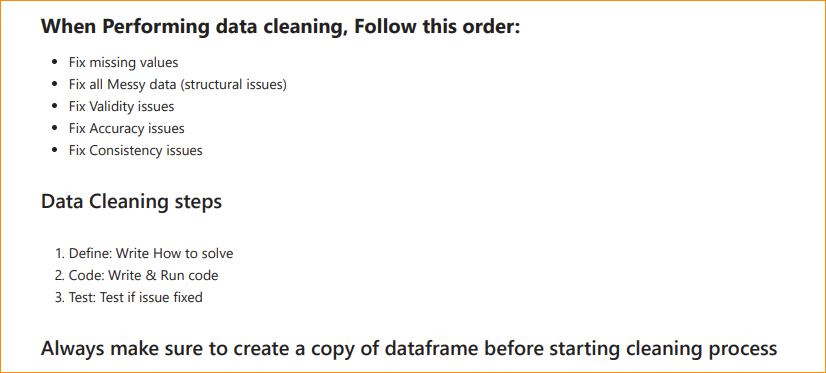

In [72]:
#no missing vlaue to fix
df1.isnull().sum()

productName    0
price          0
rating         0
specScore      0
features       0
brand          0
processor      0
storage        0
cores          0
ram            0
screen_size    0
Warranty       0
OS             0
graphics       0
dtype: int64

In [73]:
#fix all messy data (structural issue)

In [74]:
# storage: change into 2 col: storage_capacity & storage_type
# cores: remove other info, only keep core count
# ram: change into 2 col: ram capacity & ram count
# screen_size: change into 3 cols: size, resolution & touch screen True or False

In [75]:
df1['storage'].str.strip().str.split(" ").str[1].value_counts()

SSD      960
GB        17
eMMC      17
UFS        6
TB         4
256GB      4
           2
HDD        1
Name: storage, dtype: int64

In [76]:
storage_types = ['SSD', 'eMMC', 'UFS', 'HDD', 'Hard Disk']

def get_storage_type(storage_str):
    storage_str = storage_str.upper()  # Convert to uppercase for case-insensitivity
    for storage_type in storage_types:
        if storage_type in storage_str:
            return storage_type
    return 'Unknown'  # Return 'Unknown' if no storage type is found

In [77]:
# Apply the function to create the 'storage_type' column
df1['storage_type'] = df1['storage'].apply(get_storage_type)

In [78]:
df1['storage_type'].value_counts()

SSD        987
Unknown     24
UFS          6
HDD          1
Name: storage_type, dtype: int64

In [79]:
df1[df1['storage_type'] == 'Unknown']

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type
45,HP Chromebook x360 ‎14a-ca0505TU Laptop (Intel Celeron N4120/ 4GB/ 64GB eMMC/ Chrome OS),"₹17,990",4.05,41.0,"['Intel Celeron N4120', 'Quad Core, 4 Threads', '4\u2009GB DDR4 RAM', '64\u2009GB Hard Disk', 'Intel Integrated UHD 600', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels, Touch Screen', 'Chrome OS OS', '1 Year Warranty']",HP,Intel Celeron N4120,64GB eMMC,No Cores,4 GB DDR4 RAM,"14 inches, 1366 x 768 pixels, Touch Screen",1 Year Warranty,Chrome OS OS,intel integrated uhd,Unknown
47,Dell Vostro 3481 Laptop (8th Gen Core i5/ 8GB/ 1TB/ Linux/ 2GB Graph),"₹46,790",4.65,54.0,"['8th Gen Intel Core i5 8265U', 'Quad Core, 8 Threads', '8\u2009GB DDR4 RAM', '1\u2009TB Hard Disk', '2\u2009GB AMD Radeon 520', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Linux OS', '1 Year Warranty']",Dell,8th Gen Core i5,1TB,No Cores,8 GB DDR4 RAM,"14 inches, 1366 x 768 pixels",1 Year Warranty,Linux OS,amd radeon,Unknown
59,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '256\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
74,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),"₹10,990",4.75,28.0,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",HP,MediaTek MT8183,32GB eMMC,No Cores,4 GB LPDDR4X RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,Chrome OS,Arm Mali-G72 MP3,Unknown
106,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),"₹10,990",4.75,28.0,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",HP,MediaTek MT8183,32GB eMMC,No Cores,4 GB LPDDR4X RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,Chrome OS,Arm Mali-G72 MP3,Unknown
132,Dell Vostro 3481 Laptop (8th Gen Core i5/ 8GB/ 1TB/ Linux/ 2GB Graph),"₹46,790",4.65,54.0,"['8th Gen Intel Core i5 8265U', 'Quad Core, 8 Threads', '8\u2009GB DDR4 RAM', '1\u2009TB Hard Disk', '2\u2009GB AMD Radeon 520', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Linux OS', '1 Year Warranty']",Dell,8th Gen Core i5,1TB,No Cores,8 GB DDR4 RAM,"14 inches, 1366 x 768 pixels",1 Year Warranty,Linux OS,amd radeon,Unknown
133,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '256\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
264,Apple MacBook Air 2024 MXCT3HN/A Laptop (Apple M3/ 16GB/ 512GB SSD/ MacOS),"₹1,47,990",4.05,52.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '512\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
285,Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 64B eMMC/ Prime OS),"₹10,990",4.25,30.0,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Primebook,MediaTek MT8183,64B eMMC,No Cores,4 GB LPDDR4 RAM,"11.6 inches, 1366 x 768 pixels",1 Year Warranty,No OS,ARM Mali G72,Unknown
432,Apple MacBook 

In [80]:
# List of indices where the storage_type should be set to 'hard disk'
indices_to_update = [45, 47, 74, 106, 132, 285, 444, 456, 474, 567, 577, 608, 841, 940, 946, 982, 1003]

# Assign 'hard disk' to the 'storage_type' column at the specified indices
df1.loc[indices_to_update, 'storage_type'] = 'hard disk'

In [81]:
df1['storage_type'].value_counts()

SSD          987
hard disk     17
Unknown        7
UFS            6
HDD            1
Name: storage_type, dtype: int64

In [82]:
df1[df1['storage_type'] == 'Unknown']

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type
59,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '256\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
133,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '256\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
264,Apple MacBook Air 2024 MXCT3HN/A Laptop (Apple M3/ 16GB/ 512GB SSD/ MacOS),"₹1,47,990",4.05,52.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '512\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
432,Apple MacBook Air 15 2024 MRYR3HN/A Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,23,900",4.10,54.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,10-Core GPU,Unknown
491,Asus Chromebook CX1500CKA-EJ0277 Laptop (Celeron N4500/ 4GB/ 128GB eMMC/ Chrome OS),"₹18,990",4.30,32.0,"['Intel Celeron N4500', 'Dual Core, 2 Threads', '4\u2009GB LPDDR4X RAM', '128\u2009GB SSD', 'Intel Integrated UHD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Chrome OS', '1 Year Warranty']",Asus,Celeron N4500,128GB eMMC,No Cores,4 GB LPDDR4X RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Chrome OS,intel integrated uhd,Unknown
674,Asus Chromebook CX1400CKA-NK0453 Laptop (Celeron N4500/ 4GB/ 64GB eMMC/ Chrome OS),"₹18,990",4.05,33.0,"['Intel Celeron N4500', 'Dual Core, 2 Threads', '4\u2009GB LPDDR4X RAM', '64\u2009GB SSD', 'Intel Integrated UHD', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Chrome OS', '1 Year Warranty']",Asus,Celeron N4500,64GB eMMC,No Cores,4 GB LPDDR4X RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Chrome OS,intel integrated uhd,Unknown
900,Apple MacBook Air 2024 MRYN3HN/A Laptop (Apple M3/ 8GB/ 512GB SSD/ MacOS),"₹1,45,490",4.15,56.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,10-Core GPU,Unknown


In [83]:
# List of indices where the storage_type should be set to 'hard disk'
indices_to_update = [59, 133, 432]

# Assign 'hard disk' to the 'storage_type' column at the specified indices
df1.loc[indices_to_update, 'storage_type'] = 'SSD'

In [84]:
df1[df1['storage_type'] == 'Unknown']

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type
264,Apple MacBook Air 2024 MXCT3HN/A Laptop (Apple M3/ 16GB/ 512GB SSD/ MacOS),"₹1,47,990",4.05,52.0,"['Apple M3', 'Octa Core (4P + 4E)', '16\u2009GB RAM', '512\u2009GB SSD', 'Apple 10 Core GPU', '13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,16GB,No Cores,16 GB RAM,"13.6 inches, 2560 x 1664 pixels",1 Year Warranty,Mac OS,10 Core GPU,Unknown
491,Asus Chromebook CX1500CKA-EJ0277 Laptop (Celeron N4500/ 4GB/ 128GB eMMC/ Chrome OS),"₹18,990",4.30,32.0,"['Intel Celeron N4500', 'Dual Core, 2 Threads', '4\u2009GB LPDDR4X RAM', '128\u2009GB SSD', 'Intel Integrated UHD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Chrome OS', '1 Year Warranty']",Asus,Celeron N4500,128GB eMMC,No Cores,4 GB LPDDR4X RAM,"15.6 inches, 1920 x 1080 pixels",1 Year Warranty,Chrome OS,intel integrated uhd,Unknown
674,Asus Chromebook CX1400CKA-NK0453 Laptop (Celeron N4500/ 4GB/ 64GB eMMC/ Chrome OS),"₹18,990",4.05,33.0,"['Intel Celeron N4500', 'Dual Core, 2 Threads', '4\u2009GB LPDDR4X RAM', '64\u2009GB SSD', 'Intel Integrated UHD', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Chrome OS', '1 Year Warranty']",Asus,Celeron N4500,64GB eMMC,No Cores,4 GB LPDDR4X RAM,"14 inches, 1920 x 1080 pixels",1 Year Warranty,Chrome OS,intel integrated uhd,Unknown
900,Apple MacBook Air 2024 MRYN3HN/A Laptop (Apple M3/ 8GB/ 512GB SSD/ MacOS),"₹1,45,490",4.15,56.0,"['Apple M3', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M3,8GB,No Cores,8 GB DDR4 RAM,"15.3 inches, 2880 x 1864 pixels",1 Year Warranty,Mac OS,10-Core GPU,Unknown


In [85]:
# List of indices where the storage_type should be set to 'hard disk'
indices_to_update = [264, 491, 674, 900]

# Assign 'hard disk' to the 'storage_type' column at the specified indices
df1.loc[indices_to_update, 'storage_type'] = 'SSD'

In [86]:
df1['storage_type'].value_counts()

SSD          994
hard disk     17
UFS            6
HDD            1
Name: storage_type, dtype: int64

In [87]:
df1['storage'] = df1['storage'].str.strip().str.split(" ").str[0]

In [88]:
##core - remoce other info & only keep core count

df1['cores'] = df1['cores'].str.strip().str.split("Cores").str[0]

In [89]:
# ram: change into 2 col: ram capacity & ram type

df1['ram_type'] = df1['ram'].str.strip().str.split("GB").str[1].str.replace("RAM","")
df1['ram'] = df1['ram'].str.strip().str.split("GB").str[0]

In [99]:
# screen_size: change into 3 cols: size, resolution & touch screen True or False

df1['touch_screen'] = df1['screen_size'].str.strip().str.split(",").str[2]
df1['resolution'] = df1['screen_size'].str.strip().str.split(",").str[1]
df1['screen_size'] = df1['screen_size'].str.strip().str.split(",").str[0]

In [100]:
df1.isnull().sum()

productName       0
price             0
rating            0
specScore         0
features          0
brand             0
processor         0
storage           0
cores             0
ram               0
screen_size       0
Warranty          0
OS                0
graphics          0
storage_type      0
ram_type          0
touch_screen    897
resolution        0
dtype: int64

In [101]:
#we can drop touch screen column bcoz most of the laptop doesnt have that

In [102]:
df1.drop(columns=['touch_screen'], inplace=True)

In [103]:
df1.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       0
storage         0
cores           0
ram             0
screen_size     0
Warranty        0
OS              0
graphics        0
storage_type    0
ram_type        0
resolution      0
dtype: int64

In [104]:
df1.sample(5)

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution
881,Lenovo ThinkPad P14s 21HF001FIG Laptop (13th Gen Core i7/ 16GB/ 512GB SSD/ Win11 Pro/ 4GB Graphics),"₹1,30,538",4.70,72.0,"['13th Gen Intel Core i7 1360P', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB LPDDR5X RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA RTX A500', '14\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '3 Year Warranty']",Lenovo,13th Gen Core i7,512GB,12,16,14 inches,3 Year Warranty,Windows 11 OS,nvidia rtx a500,SSD,LPDDR5X,1920 x 1200 pixels
78,MSI Thin A15 AI B7VE-065IN Gaming Laptop (AMD Ryzen 7 7735H/ 16GB/ 1TB SSD/ Win11/ 6GB Graph),"₹84,990",4.25,73.0,"['7th Gen AMD Ryzen 7 7735HS', 'Octa Core, 16 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '6\u2009GB NVIDIA GeForce RTX 4050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,AMD Ryzen 7 7735H,1TB,No,16,15.6 inches,2 Year Warranty,Windows 11 OS,rtx 4050,SSD,DDR4,1920 x 1080 pixels
538,HP 15s-fr4001TU Laptop (11th Gen Core i5/16GB/ 512GB SSD/ Win11 Home),"₹50,490",4.15,60.0,"['11th Gen Intel Core i5 1155G7', 'Quad Core, 8 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Integrated Iris Xe', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,11th Gen Core i5,512GB,No,16,15.6 inches,1 Year Warranty,Windows 11 OS,intel integrated iris xe,SSD,DDR4,1920 x 1080 pixels
743,MSI Modern 15 H B13M-224IN Laptop (13th Gen Core i9/ 16GB/ 512GB SSD/ Win11 Home),"₹76,990",4.60,66.0,"['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Iris Xe Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",MSI,13th Gen Core i9,512GB,14,16,15.6 inches,1 Year Warranty,Windows 11 OS,intel iris xe graphics,SSD,DDR4,1920 x 1080 pixels
146,MSI Thin A15 AI B7VF-064IN Gaming Laptop (AMD Ryzen 7 7735H/ 16GB/ 1TB SSD/ Win11/ 8GB Graph),"₹93,990",4.35,75.0,"['7th Gen AMD Ryzen 7 7735HS', 'Octa Core, 16 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4060', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,AMD Ryzen 7 7735H,1TB,No,16,15.6 inches,2 Year Warranty,Windows 11 OS,rtx 4060,SSD,DDR4,1920 x 1080 pixels


In [105]:
#fix all validity issue

# Validity:

# Price: Remove the ₹ symbol and convert prices to integer values.
# Warranty: Convert warranty periods into months and keep only numerical values. Remove any non-numerical characters.
# OS: Remove unnecessary text like "OS" and fix escape sequences (e.g., convert Mac 10.15.3\t OS to Mac 10.15.3).

In [111]:
df1['price'] = df1['price'].str.replace("₹","").str.replace(",","").astype(int)

In [112]:
df1['Warranty'].sample(7)

393    1 Year Warranty
402    1 Year Warranty
549    1 Year Warranty
456    1 Year Warranty
99     1 Year Warranty
379    1 Year Warranty
681    1 Year Warranty
Name: Warranty, dtype: object

In [120]:
df1['Warranty'].str.split("Year").str[0].value_counts()

1                    903
2                     94
No Warranty           12
3                      8
1 Months Warranty      1
Name: Warranty, dtype: int64

In [121]:
# Function to convert warranty to months
def convert_warranty_to_months(warranty_str):
    # Normalize the string
    warranty_str = warranty_str.strip().lower()
    
    if 'no warranty' in warranty_str:
        return 0
    
    # Extract the number and the unit
    if 'year' in warranty_str:
        number = int(''.join(filter(str.isdigit, warranty_str)))
        return number * 12
    elif 'month' in warranty_str:
        number = int(''.join(filter(str.isdigit, warranty_str)))
        return number
    return None  # Handle unexpected values

In [124]:
df1['Warranty'] = df1['Warranty'].apply(convert_warranty_to_months)

In [128]:
df1['OS'] = df1['OS'].str.replace("OS","").str.replace("Mac 10.15.3\t", "Mac 10.15.3")

C:\Users\iampr\AppData\Local\Temp\ipykernel_3488\2595502516.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['OS'] = df1['OS'].str.replace("OS","").str.replace("Mac 10.15.3\t", "Mac 10.15.3")


In [129]:
df1.isnull().sum()

productName     0
price           0
rating          0
specScore       0
features        0
brand           0
processor       0
storage         0
cores           0
ram             0
screen_size     0
Warranty        0
OS              0
graphics        0
storage_type    0
ram_type        0
resolution      0
dtype: int64

In [130]:
# fix all accuracy issue
# Accuracy:

# Brand: Consolidate brands with fewer than 20 occurrences into an "Others" category.
# Processor: Categorize processors into lower-level categories (e.g., i3, i5, i7).
# Storage: Remove "GB" or "TB" and convert all storage values into a uniform scale (e.g., convert everything to GB).
# RAM: Convert RAM values into a uniform scale (e.g., GB).
# Graphics: Categorize graphics-related terms into broader, standardized categories.

In [132]:
df1['brand'].value_counts()

HP           207
Lenovo       193
Asus         142
MSI          113
Acer         100
Dell          94
Samsung       30
Apple         27
Infinix       23
Microsoft     21
Honor          8
Gigabyte       7
Thomson        6
Xiaomi         6
Chuwi          5
Zebronics      4
Colorful       4
Primebook      4
Huawei         4
Avita          4
AGB            3
Ultimus        3
Air            2
Realme         2
Razer          1
ASUS           1
‎Lenovo        1
Walker         1
Red            1
Jio            1
Name: brand, dtype: int64

In [133]:
# Get the count of each brand
brand_counts = df1['brand'].value_counts()

# Identify brands with count less than 20
brands_to_tag_as_other = brand_counts[brand_counts < 20].index

In [136]:
# Create a mapping to replace these brands with 'Other'
df1['brand'] = df1['brand'].apply(lambda x: 'Other' if x in brands_to_tag_as_other else x)

In [137]:
df1['processor'].value_counts()

12th Gen Core i5                      137
13th Gen Core i5                      101
13th Gen Core i7                       83
12th Gen Core i3                       58
12th Gen Core i7                       48
Intel Core Ultra 7 155H                36
11th Gen Core i5                       31
14th Gen Core i9                       23
13th Gen Core i3                       21
13th Gen Core i9                       20
14th Gen Core i7                       18
Intel Core Ultra 7                     17
Intel Core Ultra 9 185H                17
Intel Core Ultra 5 125H                17
AMD Ryzen 7 7840HS                     14
Snapdragon X Elite                     14
AMD Ryzen 5 7535HS                     13
Intel Core Ultra 5                     13
11th Gen Core i7                       11
11th Gen Core i3                       10
AMD Ryzen 5 5500U                      10
AMD Ryzen 7 5700U                      10
Celeron N4020                           8
AMD Ryzen 5 7530U                 

In [139]:
# Print original value counts
print("Original Processor Counts:")
print(df1['processor'].value_counts())

# Define mapping of specific processors to broader categories
processor_mapping = {
    '12th Gen Core i5': 'Intel Core i5',
    '13th Gen Core i5': 'Intel Core i5',
    '13th Gen Core i7': 'Intel Core i7',
    '12th Gen Core i3': 'Intel Core i3',
    '12th Gen Core i7': 'Intel Core i7',
    'Intel Core Ultra 7 155H': 'Intel Core Ultra',
    '11th Gen Core i5': 'Intel Core i5',
    'Intel Core Ultra 7': 'Intel Core Ultra',
    '13th Gen Core i9': 'Intel Core i9',
    '13th Gen Core i3': 'Intel Core i3',
    '14th Gen Core i9': 'Intel Core i9',
    '14th Gen Core i7': 'Intel Core i7',
    'Intel Core Ultra 5 125H': 'Intel Core Ultra',
    'Intel Core Ultra 9 185H': 'Intel Core Ultra',
    'AMD Ryzen 5 7535HS': 'AMD Ryzen 5',
    '11th Gen Core i3': 'Intel Core i3',
    'Intel Core Ultra 5': 'Intel Core Ultra',
    'AMD Ryzen 7 7840HS': 'AMD Ryzen 7',
    'AMD Ryzen 5 5500U': 'AMD Ryzen 5',
    '11th Gen Core i7': 'Intel Core i7',
    'Celeron N4020': 'Others',
    'AMD Ryzen 5 7530U': 'AMD Ryzen 5',
    'Apple M3': 'Apple M Series',
    'Apple M3 Pro': 'Apple M Series',
    'Snapdragon X Elite': 'Others',
    'Celeron N4500': 'Others',
    'Ryzen 3 7320U': 'AMD Ryzen 3',
    'Intel Celeron N4500': 'Others',
    'AMD Ryzen 7 7730U': 'AMD Ryzen 7',
    'AMD Ryzen 7 7435HS': 'AMD Ryzen 7',
    'AMD Ryzen 7 8845HS': 'AMD Ryzen 7',
    'Intel Core 5 Processor 120U': 'Others',
    'AMD Ryzen 3 7320U': 'AMD Ryzen 3',
    'Apple M2': 'Apple M Series',
    'AMD Ryzen 5 7520U': 'AMD Ryzen 5',
    'Apple M3 Max': 'Apple M Series',
    'Ryzen 5 7520U': 'AMD Ryzen 5',
    '10th Gen Core i5': 'Intel Core i5',
    'Intel Core Ultra 9': 'Intel Core Ultra',
    'AMD Ryzen 7 7735H': 'AMD Ryzen 7',
    'AMD Ryzen 5 5600H': 'AMD Ryzen 5',
    'AMD Ryzen 7 5700U': 'AMD Ryzen 7',
    'AMD Ryzen 3 5300U': 'AMD Ryzen 3',
    'Intel Core 5 120U': 'Others',
    'AMD Ryzen 3 7330U': 'AMD Ryzen 3',
    '12th Gen Core i5-12450H': 'Intel Core i5',
    'AMD Ryzen 9 8945HS': 'AMD Ryzen 9',
    'Intel Core 7 Processor 150U': 'Others',
    'AMD Ryzen 7 7735HS': 'AMD Ryzen 7',
    'Intel Core i3-N305': 'Intel Core i3',
    'Intel Core Ultra 5 125U': 'Intel Core Ultra',
    'Intel Core i3 N305': 'Intel Core i3',
    'Intel Core Ultra 7 155U': 'Intel Core Ultra',
    'AMD Ryzen 5 7535H': 'AMD Ryzen 5',
    'Ryzen 5 5600H': 'AMD Ryzen 5',
    'Snapdragon X Plus': 'Others',
    'MediaTek MT8183': 'Others',
    '10th Gen Core i3': 'Intel Core i3',
    'AMD Ryzen 3 3250U': 'AMD Ryzen 3',
    'MediaTek Kompanio 520': 'Others',
    'Intel Processor N100': 'Others',
    'Kirin 9006C': 'Others',
    'AMD Ryzen R3-7320U': 'AMD Ryzen 3',
    'Ryzen 5 5500U': 'AMD Ryzen 5',
    'Intel Celeron N5100': 'Others',
    'Octa Core': 'Others',
    'Intel Celeron N4020': 'Others',
    'AMD Athlon Silver 7120U': 'Others',
    'Apple M1': 'Apple M Series',
    'Ryzen 5 7530U': 'AMD Ryzen 5',
    '10th Gen Core i7': 'Intel Core i7',
    'AMD Ryzen 7 6800H': 'AMD Ryzen 7',
    'Intel Core Celeron N4500': 'Others',
    'AMD Ryzen 5 7235HS': 'AMD Ryzen 5',
    'AMD Ryzen 9 AI HX 370': 'AMD Ryzen 9',
    'AMD Ryzen 7 7840H': 'AMD Ryzen 7',
    '7 ‎ZGM-00023 Snapdragon X Plus': 'Others',
    'Intel Evo Core Ultra 7 155H': 'Intel Core Ultra',
    'AMD Ryzen AI 9 HX 370': 'AMD Ryzen 9',
    'Intel Core 5 120U Processor': 'Others',
    '7 15 ‎‎ZYT-00048 Snapdragon X Elite': 'Others',
    '7 15 ‎ZHG-00023 Snapdragon X Elite': 'Others',
    'Ryzen AI 9 HX 370': 'AMD Ryzen 9',
    '7 ‎ZXX-00059 Snapdragon X Elite': 'Others',
    '7 13.8 ‎‎ZGQ-00023 Snapdragon X Elite': 'Others',
    '13th Gen Intel Core i5-1335U': 'Intel Core i5',
    '7 15 ‎ZHH-00048 Snapdragon X Elite': 'Others',
    'Intel Processor N200': 'Others',
    '13th Gen Core i3 1315U': 'Intel Core i3',
    'AMD Ryzen R7 5700U': 'AMD Ryzen 7',
    'AMD Ryzen 7 7735U': 'AMD Ryzen 7',
    'AMD Ryzen AI 300 Series Processors': 'Others',
    'Intel Core 7 150U Processor': 'Others',
    'AMD Ryzen 9 7940HS': 'AMD Ryzen 9',
    'Intel Core 3 100U': 'Others',
    '6 Intel Core Ultra 7 165H': 'Intel Core Ultra',
    'Intel Core Ultra 7 165U': 'Intel Core Ultra',
    'Intel Pentium Gold 7505': 'Others',
    'Intel Core 3 Processor 100U': 'Others',
    'AMD Ryzen 7 8840HS': 'AMD Ryzen 7',
    'Intel Celeron N100': 'Others',
    'Intel Pentium Gold': 'Others',
    'Intel Pentium N100': 'Others',
    '8th Gen Core i5': 'Intel Core i5',
    'Intel Celeron N4120': 'Others',
    'Snapdragon X Elite X1E-80-100': 'Others',
    'Intel Core i5 1335U': 'Intel Core i5',
    'Intel Evo Core Ultra 7 155U': 'Intel Core Ultra',
    'AMD Ryzen 7 Pro 7840U': 'AMD Ryzen 7',
    'AMD Ryzen 9 8945H': 'AMD Ryzen 9',
    'Snapdragon X Elite X1E-78-100': 'Others',
    'Intel 12th Gen Core i7': 'Intel Core i7',
    'AMD Ryzen 5 8645HS': 'AMD Ryzen 5',
    'AMD Ryzen 5 7640HS': 'AMD Ryzen 5',
    'AMD Ryzen 7 8840U': 'AMD Ryzen 7',
    'Intel Core Ultra i7 155H': 'Intel Core Ultra',
    '7 Snapdragon X Plus': 'Others',
    'Ryzen 3 5300U': 'AMD Ryzen 3',
    'Intel Core i7 1355U': 'Intel Core i7',
    'Intel Core i5 13420H': 'Intel Core i5',
    '7 Snapdragon X Elite': 'Others',
    'AMD Ryzen 5 5600HS': 'AMD Ryzen 5',
    'AMD Ryzen 9 7845HX': 'AMD Ryzen 9',
    'AMD Athlon Silver-3050U': 'Others',
    'Ryzen 7 5800HS': 'AMD Ryzen 7',
    'AMD Ryzen 5 5625U': 'AMD Ryzen 5',
    'MediaTek MT8788': 'Others',
    'AMD Ryzen 5-5600H': 'AMD Ryzen 5',
    'Ryzen 5 6600H': 'AMD Ryzen 5',
    'AMD Athlon 3050U': 'Others',
    'Ryzen 7 5800H': 'AMD Ryzen 7',
    'Ryzen 5-5600H': 'AMD Ryzen 5',
    'Ryzen 7 5700U': 'AMD Ryzen 7',
    'AMD Ryzen 9': 'AMD Ryzen 9',
    'AMD Ryzen 3': 'AMD Ryzen 3',
    '9th Gen Core i9': 'Intel Core i9',
    '8th Gen Core i7': 'Intel Core i7',
    'AMD Ryzen 5 8540U': 'AMD Ryzen 5',
    'AMD Ryzen 7 7435H': 'AMD Ryzen 7'
}

# Apply the mapping to the 'processors' column
df1['processor'] = df1['processor'].map(processor_mapping).fillna('Others')

# Print updated value counts
print("\nUpdated Processor Counts:")
print(df1['processor'].value_counts())

Original Processor Counts:
12th Gen Core i5                      137
13th Gen Core i5                      101
13th Gen Core i7                       83
12th Gen Core i3                       58
12th Gen Core i7                       48
Intel Core Ultra 7 155H                36
11th Gen Core i5                       31
14th Gen Core i9                       23
13th Gen Core i3                       21
13th Gen Core i9                       20
14th Gen Core i7                       18
Intel Core Ultra 7                     17
Intel Core Ultra 9 185H                17
Intel Core Ultra 5 125H                17
AMD Ryzen 7 7840HS                     14
Snapdragon X Elite                     14
AMD Ryzen 5 7535HS                     13
Intel Core Ultra 5                     13
11th Gen Core i7                       11
11th Gen Core i3                       10
AMD Ryzen 5 5500U                      10
AMD Ryzen 7 5700U                      10
Celeron N4020                           8
AMD Ryz

In [142]:
# Storage: Remove "GB" or "TB" and convert all storage values into a uniform scale (e.g., convert everything to GB).
df1['storage'].value_counts()

512GB    606
1TB      288
256GB     50
2TB       21
512       15
128GB     13
64GB       8
1          4
16GB       3
32GB       3
8GB        2
4TB        1
64B        1
128        1
1T         1
256        1
Name: storage, dtype: int64

In [149]:
df1[df1['storage'] == '64B']

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution
285,Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 64B eMMC/ Prime OS),10990,4.25,30.0,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Other,Others,64B,No,4,11.6 inches,12,No,ARM Mali G72,hard disk,LPDDR4,1366 x 768 pixels


In [153]:
# Conversion function
def convert_to_gb(storage):
    if pd.isna(storage):
        return None
    storage = str(storage).upper()
    
    # Convert different units to GB
    if 'TB' in storage:
        # Convert TB to GB
        return int(storage.replace('TB', '').strip()) * 1024
    elif 'GB' in storage:
        # Keep GB as is
        return int(storage.replace('GB', '').strip())
    elif 'B' in storage:
        # Convert B to GB
        return int(storage.replace('B', '').strip()) / 1024
    elif storage.isdigit():
        # Assume digits without units are GB
        return int(storage)
    elif storage == '1T':
        # Special case for '1T'
        return 1024
    elif storage == '1':
        # Special case for '1' as TB
        return 1024
    else:
        # If none of the above, return NaN
        return None

In [160]:
# Apply the conversion function to the 'storage' column
df1['storage'] = df1['storage'].apply(convert_to_gb)

In [168]:
df1['storage'].value_counts()

512.0000     621
1024.0000    289
256.0000      51
2048.0000     21
128.0000      14
64.0000        8
1.0000         4
16.0000        3
32.0000        3
8.0000         2
4096.0000      1
0.0625         1
Name: storage, dtype: int64

In [159]:
# 0.0625 = 64gb
# 1 = 1tb = 1024gb

In [169]:
def adjust_storage(value):
    if value == 1:
        return 1024  # Convert 1 TB to 1024 GB
    if value == 0.0625:
        return 64  # Convert 0.0625 TB to 64 GB
    return value  # Otherwise, keep the value as is

In [173]:
# Apply the adjustment function
df1['storage'] = df1['storage'].apply(adjust_storage)

In [174]:
df1['ram'].value_counts()

16      596
8       294
32       83
4        21
24        5
12        5
64        4
48        3
18        3
36        3
128       1
Name: ram, dtype: int64

In [175]:
df1['graphics'].value_counts()

NVIDIA GeForce RTX 3050             105
intel iris xe graphics               97
intel integrated uhd                 78
intel uhd graphics                   73
intel integrated                     65
rtx 4060                             63
rtx 2050                             62
rtx 4050                             57
intel integrated iris xe             57
intel arc graphics                   55
amd radeon amd                       36
NVIDIA GeForce RTX 4070              34
amd radeon graphics                  34
amd radeon                           29
intel graphics                       27
Qualcomm Adreno GPU                  23
NVIDIA                               14
intel iris xe                        12
rtx 4080                             11
rtx 4090                              9
amd graphics                          8
10-Core GPU                           7
10 Core GPU                           5
ARM Mali G72                          4
Arm Mali-G72 MP3                      3


In [182]:
# Define conversion function
def categorize_graphics(graphics):
    if 'NVIDIA GeForce' in graphics:
        return 'NVIDIA'
    elif 'intel' in graphics:
        return 'Intel'
    elif 'AMD Radeon' in graphics or 'AMD Graphics' in graphics:
        return 'AMD Radeon'
    elif 'Qualcomm Adreno' in graphics or 'ARM Mali' in graphics or 'Apple' in graphics:
        return 'Qualcomm and ARM'
    elif 'rtx' in graphics:
        return 'NVIDIA'    
    else:
        return 'Other/Unknown'

# Apply categorization
df1['graphics_category'] = df1['graphics'].apply(categorize_graphics)

In [186]:
df1['graphics'].value_counts()

NVIDIA GeForce RTX 3050             105
intel iris xe graphics               97
intel integrated uhd                 78
intel uhd graphics                   73
intel integrated                     65
rtx 4060                             63
rtx 2050                             62
rtx 4050                             57
intel integrated iris xe             57
intel arc graphics                   55
amd radeon amd                       36
NVIDIA GeForce RTX 4070              34
amd radeon graphics                  34
amd radeon                           29
intel graphics                       27
Qualcomm Adreno GPU                  23
NVIDIA                               14
intel iris xe                        12
rtx 4080                             11
rtx 4090                              9
amd graphics                          8
10-Core GPU                           7
10 Core GPU                           5
ARM Mali G72                          4
Arm Mali-G72 MP3                      3


In [188]:
df1.isnull().sum()

productName          0
price                0
rating               0
specScore            0
features             0
brand                0
processor            0
storage              0
cores                0
ram                  0
screen_size          0
Warranty             0
OS                   0
graphics             0
storage_type         0
ram_type             0
resolution           0
graphics_category    0
dtype: int64

In [203]:
df1.drop(columns=['screen_resolution','screen_resolution'], inplace=True)

In [205]:
df1['resolution'].value_counts()

 1920 x 1080 pixels    595
 1920 x 1200 pixels    137
 2560 x 1600 pixels     69
 2880 x 1800 pixels     54
 1366 x 768 pixels      42
 2560 x 1440 pixels     14
 3840 x 2400 pixels     11
 2880 x 1920 pixels     10
 3200 x 2000 pixels      8
 2240 x 1400 pixels      7
 1080 x 1920 pixels      7
 2560 x 1664 pixels      7
 2880 x 1620 pixels      6
 3456 x 2234 pixels      6
 2304 x 1536 pixels      5
 3024 x 1964 pixels      5
 2880 x 1864 pixels      5
 3072 x 1920 pixels      4
 3840 x 2160 pixels      3
 2160 x 1440 pixels      3
 2496 x 1664 pixels      3
 2048 x 1280 pixels      2
 1536 x 1024 pixels      2
 3120 x 2080 pixels      2
 2256 x 1504 pixels      2
 1440 x 2560 pixels      2
 3200 x 1800 pixels      1
 1440 x 2160 pixels      1
 1920 x 2880 pixels      1
 2944 x 1840 pixels      1
 3000 x 2000 pixels      1
 2561 x 1600 pixels      1
 2520 x 1680 pixels      1
Name: resolution, dtype: int64

In [209]:
df1.drop(columns=['resolution_category'], inplace=True)

In [212]:
df1['resolution'] = df1['resolution'].str.strip()

In [213]:
df1['resolution'].value_counts()

1920 x 1080    595
1920 x 1200    137
2560 x 1600     69
2880 x 1800     54
1366 x 768      42
2560 x 1440     14
3840 x 2400     11
2880 x 1920     10
3200 x 2000      8
2240 x 1400      7
1080 x 1920      7
2560 x 1664      7
2880 x 1620      6
3456 x 2234      6
2304 x 1536      5
3024 x 1964      5
2880 x 1864      5
3072 x 1920      4
3840 x 2160      3
2160 x 1440      3
2496 x 1664      3
2048 x 1280      2
1536 x 1024      2
3120 x 2080      2
2256 x 1504      2
1440 x 2560      2
3200 x 1800      1
1440 x 2160      1
1920 x 2880      1
2944 x 1840      1
3000 x 2000      1
2561 x 1600      1
2520 x 1680      1
Name: resolution, dtype: int64

In [215]:
# Define a function to categorize resolutions
def categorize_resolution(resolution):
    width, height = map(int, resolution.split('x'))
    if width == 1920 and height == 1080:
        return 'Standard HD (16:9)'
    elif width == 1920 and height == 1200:
        return 'Widescreen (16:10)'
    elif width >= 2560 and height >= 1440:
        return 'Quad HD or higher'
    elif width >= 3840 and height >= 2160:
        return 'Ultra HD (4K)'
    elif width > height:
        return 'Widescreen or Custom'
    else:
        return 'Other'

# Apply categorization
df1['resolution_category'] = df1['resolution'].apply(categorize_resolution)

In [216]:
df1['resolution_category'].value_counts()

Standard HD (16:9)      595
Quad HD or higher       208
Widescreen (16:10)      137
Widescreen or Custom     67
Other                    11
Name: resolution_category, dtype: int64

In [217]:
df1.head()

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB RTX2050),69990,4.60,69.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 2050', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,Intel Core i5,512.0,12,16,16 inches,12,Windows 11,rtx 2050,SSD,DDR4,1920 x 1200,NVIDIA,Widescreen (16:10)
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12th Gen Core i5/ 16GB/ 1TB SSD/ Win11/ 4GB RTX3050),74990,4.05,71.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '4\u2009GB NVIDIA GeForce RTX 3050', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,Intel Core i5,1024.0,12,16,16 inches,12,Windows 11,NVIDIA GeForce RTX 3050,SSD,DDR4,1920 x 1200,NVIDIA,Widescreen (16:10)
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD Ryzen 3 7330U/ 8 GB/ 512 GB SSD/ Win11),28660,4.20,62.0,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'AMD Radeon AMD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,AMD Ryzen 3,512.0,No,8,15.6 inches,12,Windows 11,amd radeon amd,SSD,DDR4,1920 x 1080,Other/Unknown,Standard HD (16:9)
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ RTX 2050),57990,4.75,61.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 2050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,Intel Core i5,512.0,No,16,15.6 inches,12,Windows 11,rtx 2050,SSD,DDR4,1920 x 1080,NVIDIA,Standard HD (16:9)
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),24990,4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,Intel Core i3,512.0,No,8,14 inches,12,Windows 11,intel iris xe graphics,SSD,DDR4,1920 x 1080,Intel,Standard HD (16:9)


In [218]:
df1.isnull().sum()

productName            0
price                  0
rating                 0
specScore              0
features               0
brand                  0
processor              0
storage                0
cores                  0
ram                    0
screen_size            0
Warranty               0
OS                     0
graphics               0
storage_type           0
ram_type               0
resolution             0
graphics_category      0
resolution_category    0
dtype: int64

In [219]:
df1.to_excel("cleaned_smartprix_laptop2.xlsx", index=False)

## 2nd round cleaning is completed -- we can move to EDA